# **LAB 1 - PART 2**
- Data Exploration, Cleansing, and Transform
- Remove variables with High Variable Correlation
- Remove Variables with High p-value according to Chi-square

### Import tools

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.feature_selection import chi2


## **1. Data Exploration**
Read the Data_example.csv files
<details>
<summary>
<font size="3" color="Yellow">
<b>Columns Information</b>
</font>
</summary>

</br>There are 25 variables:

- **ID**: ID of each client
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- **SEX**: Gender (M, F)
- **EDUCATION**: (graduate school, university, high school, others, unknown, unknown)
- **MARRIAGE**: Marital status (married, single, others)
- **AGE**: Age in years
- **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- **PAY_2**: Repayment status in August, 2005 (scale same as above)
- **PAY_3**: Repayment status in July, 2005 (scale same as above)
- **PAY_4**: Repayment status in June, 2005 (scale same as above)
- **PAY_5**: Repayment status in May, 2005 (scale same as above)
- **PAY_6**: Repayment status in April, 2005 (scale same as above)
- **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
- **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
- **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
- **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
- **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
- **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
- **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
- **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
- **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
- **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
- **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
- **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
- **default**: Default payment (Y, N)

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `pd.read_csv()`
</details>

In [144]:
### START CODE HERE ###
df = pd.read_csv("Credit-Card-Defaulter-Prediction.csv")
### END CODE HERE ###

Remove column `ID`.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `df.drop()`
</details>

In [145]:
### START CODE HERE ###
df = df.drop(["ID"],axis=1)#.drop_duplicates()
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- `
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
      dtype='object')
`

</details>

In [146]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
      dtype='object')

### Summary

In [147]:
desc = df.describe(include='all')
desc


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000,30000,30000,30000.000000,27772.000000,27643.000000,27590.000000,27493.000000,27508.000000,...,29552.000000,29440.000000,29379.000000,29206.000000,2.918700e+04,29099.000000,29040.000000,28953.000000,28923.000000,30000
unique,NaN,2,6,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,F,University,Married,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
freq,NaN,18112,14030,18290,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23364
mean,167484.322667,NaN,NaN,NaN,35.485500,-0.018040,-0.145172,-0.180718,-0.240789,-0.290316,...,43918.803093,41078.193920,39693.414071,5817.551702,6.086097e+03,5387.485652,4985.616598,4972.943356,5409.711199,NaN
std,129747.661567,NaN,NaN,NaN,9.217904,1.168002,1.246519,1.246997,1.219297,1.180443,...,64596.091009,61115.521282,59908.657894,16760.222771,2.333808e+04,17853.079395,15898.010884,15524.335412,18076.401807,NaN
min,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN
25%,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2688.000000,2195.750000,1604.000000,1084.250000,1.000000e+03,556.500000,390.000000,390.000000,326.000000,NaN
50%,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19411.500000,18620.000000,17824.000000,2219.500000,2.100000e+03,2000.000000,1600.000000,1690.000000,1600.000000,NaN
75%,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55716.250000,50950.250000,49912.500000,5100.000000,5.000000e+03,4790.000000,4220.000000,4280.000000,4200.000000,NaN


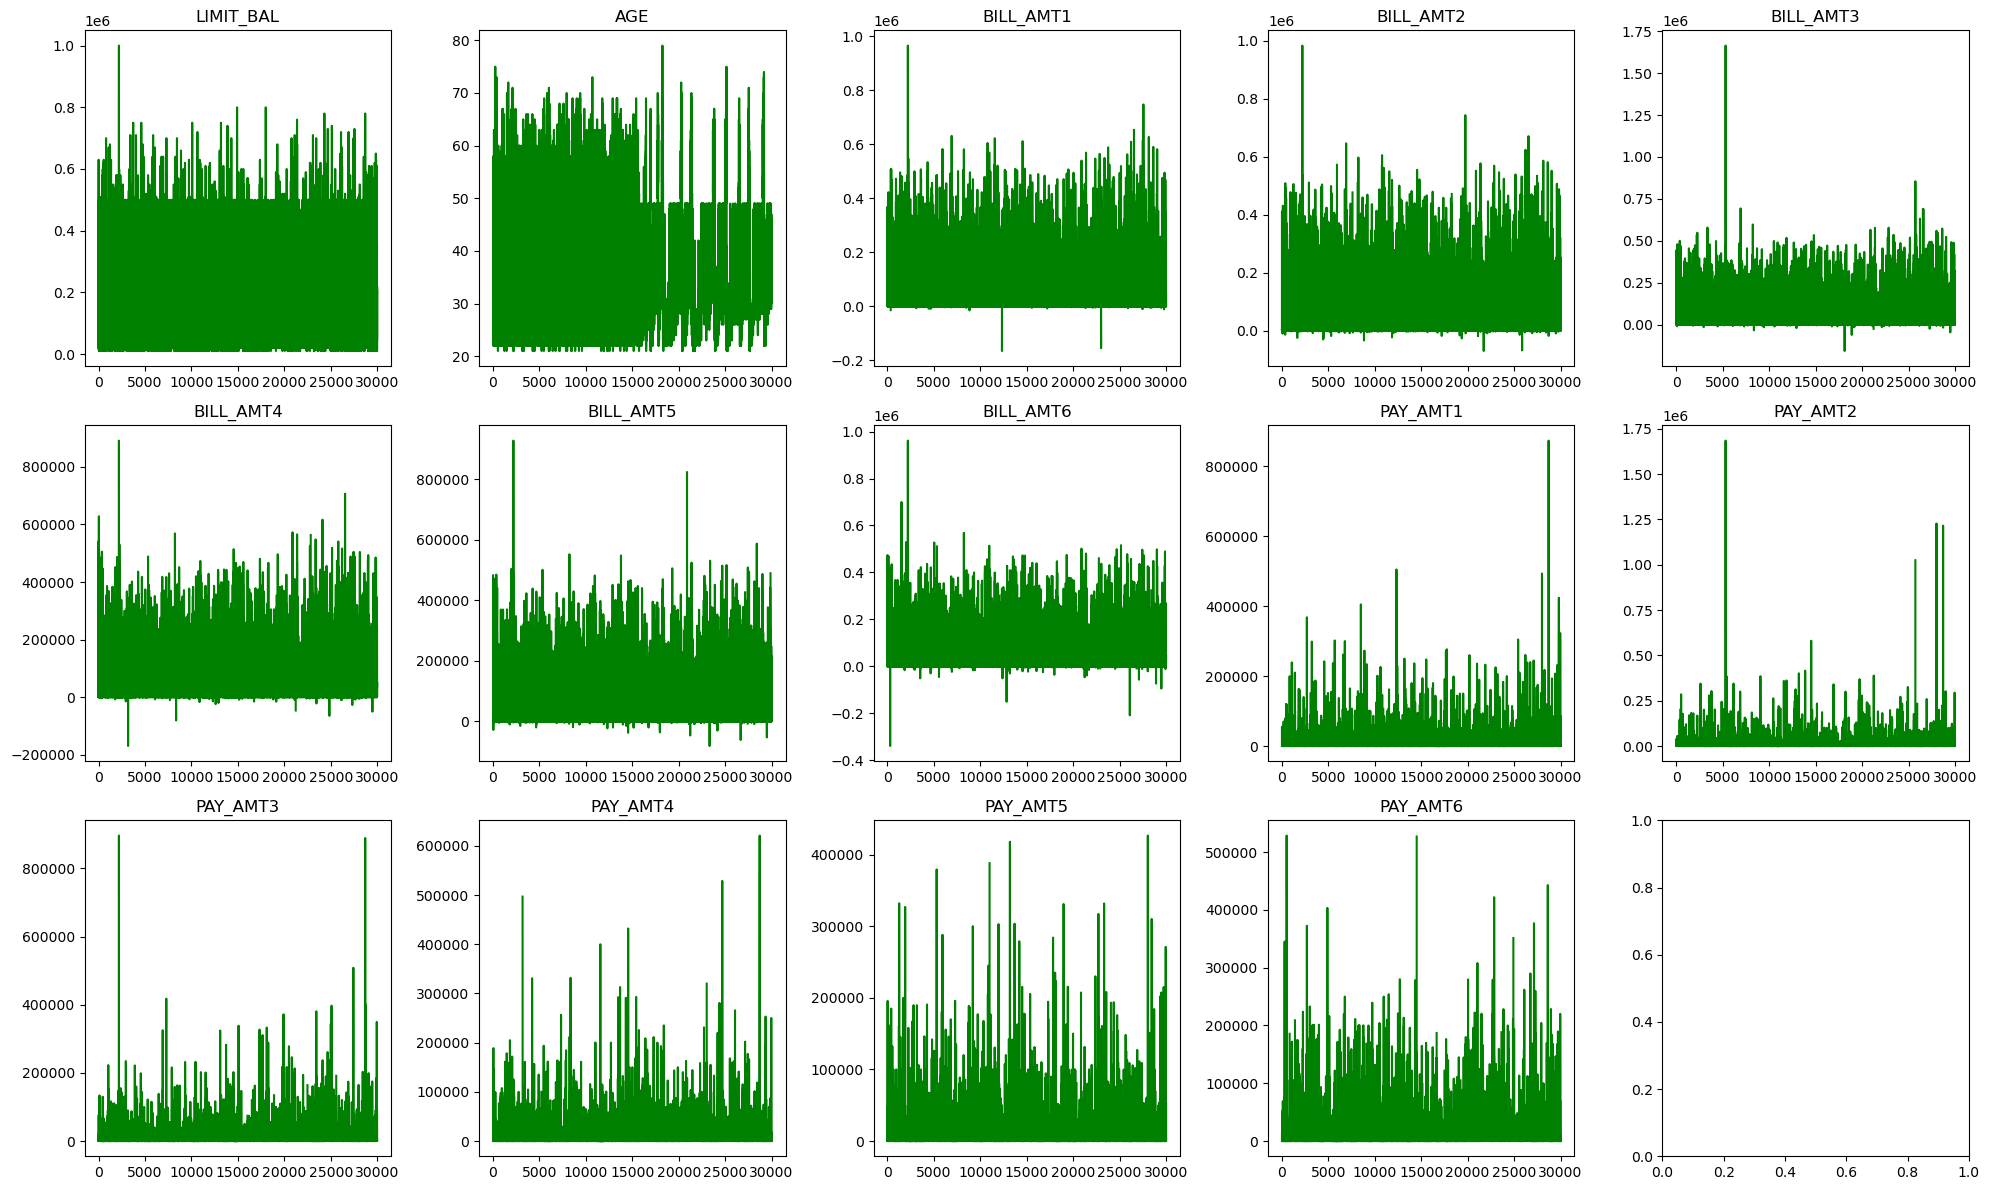

In [148]:
interested_columns = ['LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

n_cols = 5
n_rows = math.ceil(len(interested_columns) / n_cols)

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))  # Adjust the figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the interested_columns and the axes simultaneously
for col, ax in zip(interested_columns, axes):
    ax.set_title(col)
    ax.plot(df[col], color='green')

# Show the plots
plt.tight_layout()
plt.show()


#### Fill NA values
Before proceeding with filling missing values, it is crucial to comprehend the significance of each numerical column in the dataset. This understanding will guide the appropriate method for handling missing data in a way that aligns with the context and characteristics of each column.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.fillna()`
- Please explore the statistical values for each column (mean, median, min, max, etc.). Careful about column 'PAY_X'.
</details>

In [149]:
### START CODE HERE ###
fill_methods = {
    'LIMIT_BAL':"mean", 
    'SEX':'bfill', 
    'EDUCATION':"bfill", 
    'MARRIAGE':"bfill", 
    'AGE':"mean", 
    'PAY_0':"mode", 
    'PAY_2':"mode",
    'PAY_3':"mode", 
    'PAY_4':"mode", 
    'PAY_5':"mode", 
    'PAY_6':"mode", 
    'BILL_AMT1':"mean", 
    'BILL_AMT2':"mean",
    'BILL_AMT3':"mean", 
    'BILL_AMT4':"mean", 
    'BILL_AMT5':"mean", 
    'BILL_AMT6':"mean", 
    'PAY_AMT1':"mean",
    'PAY_AMT2':"mean", 
    'PAY_AMT3':"mean", 
    'PAY_AMT4':"mean", 
    'PAY_AMT5':"mean", 
    'PAY_AMT6':"mean", 
    'default ':"mode"
}

for col,meth in fill_methods.items():
    if meth == 'mean':
        df[col] = df[col].fillna(df[col].mean())
    elif meth == 'mode':
        df[col] = df[col].fillna(df[col].mode())
    else:
        df[col] = df[col].fillna(method=meth)

### END CODE HERE ###

/tmp/ipykernel_8650/569628913.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method=meth)


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>


```
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  int64  
 1   SEX        30000 non-null  object 
 2   EDUCATION  30000 non-null  object 
 3   MARRIAGE   30000 non-null  object 
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  float64
 6   PAY_2      30000 non-null  float64
 7   PAY_3      30000 non-null  float64
 8   PAY_4      30000 non-null  float64
 9   PAY_5      30000 non-null  float64
 10  PAY_6      30000 non-null  float64
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AMT4   30000 non-null  float64
 21  PAY_AMT5   30000 non-null  float64
 22  PAY_AMT6   30000 non-null  float64
 23  default    30000 non-null  object 
dtypes: float64(18), int64(2), object(4)
memory usage: 5.5+ MB
```

</details>

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  int64  
 1   SEX        30000 non-null  object 
 2   EDUCATION  30000 non-null  object 
 3   MARRIAGE   30000 non-null  object 
 4   AGE        30000 non-null  int64  
 5   PAY_0      27772 non-null  float64
 6   PAY_2      27643 non-null  float64
 7   PAY_3      27590 non-null  float64
 8   PAY_4      27493 non-null  float64
 9   PAY_5      27508 non-null  float64
 10  PAY_6      27582 non-null  float64
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

## **2. Remove variables with High Variable Correlation**

Calculate the correlation of the numerical columns.
$$
\rho_{X,Y} = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}
$$



<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Retrieve the numerical columns first, and then calculate the correlation.
- `.corr()`
</details>

In [151]:
### START CODE HERE ###
numeric_cols = ['LIMIT_BAL',  'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
correlation_matrix = df[numeric_cols].corr(method='pearson')

### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>

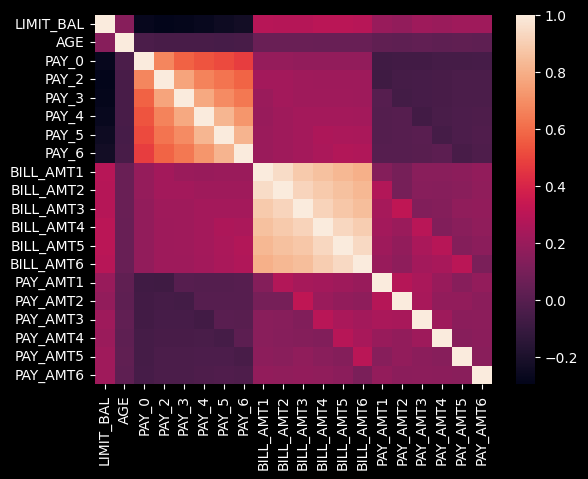
</details>

<Axes: >

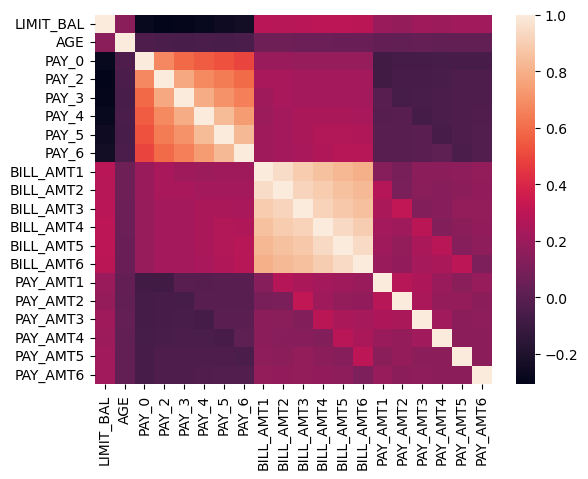

In [152]:
sns.heatmap(correlation_matrix)
# BILL_AMT ด้วยกันมีเยอะ

Extract the lower triangular part of the correlation matrix.
<details>
<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `np.tril()` migth be useful here.
</details>

In [153]:
### START CODE HERE ###
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) 
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>

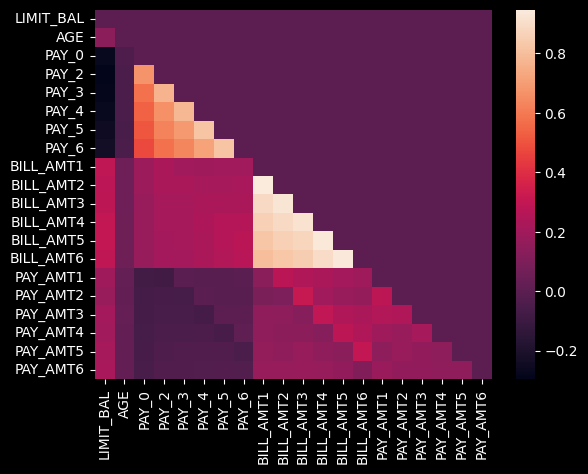
</details>

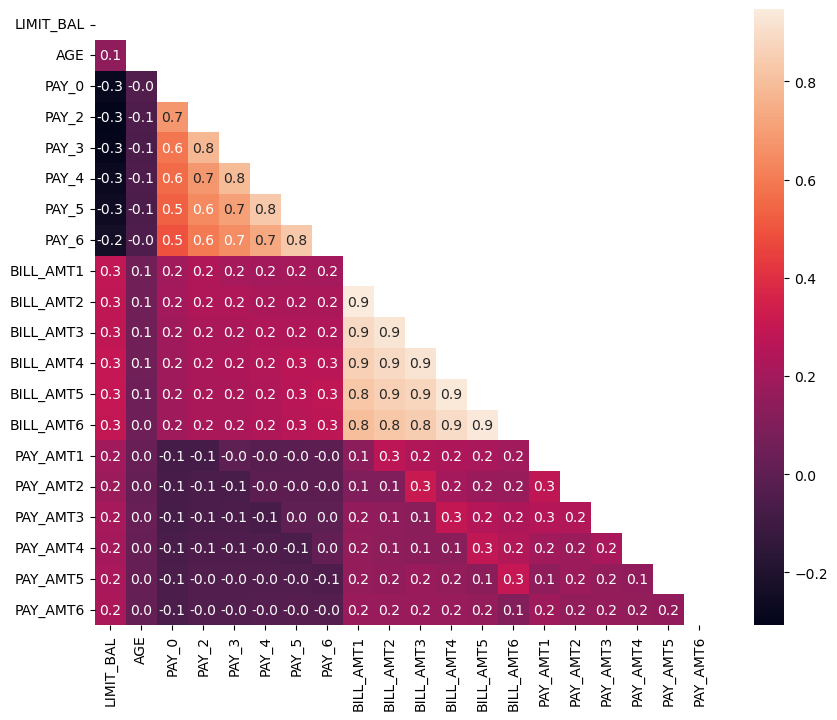

In [154]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".1f") # get rid of useless mirror
plt.show()

Drop the input variables (columns) that have high correlation (too similar) > 0.6.
(high correlation = large similarity)

In [155]:
### START CODE HERE ###
columns_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            colname = correlation_matrix.columns[i]
            columns_to_drop.add(colname)

# Dropping the columns from the DataFrame
df = df.drop(columns=columns_to_drop)
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>

|             | LIMIT_BAL | AGE   | PAY_6 | BILL_AMT6 | PAY_AMT1 | PAY_AMT2 | PAY_AMT3 | PAY_AMT4 | PAY_AMT5 | PAY_AMT6 |
|-------------|-----------|-------|-------|-----------|----------|----------|----------|----------|----------|----------|
| count       | 30000.0   | 30000 | 30000 | 30000.0   | 30000    | 30000    | 30000    | 30000    | 30000    | 30000    |
| mean        | 167484.32 | 35.49 | -0.29 | 39693.41  | 5817.55  | 6086.10  | 5387.49  | 4985.62  | 4972.94  | 5409.71  |
| std         | 129747.66 | 9.22  | 1.15  | 59285.34  | 16536.93 | 23019.67 | 17582.93 | 15641.57 | 15251.02 | 17748.95 |
| min         | 10000.0   | 21    | -2.0  | -339603.0 | 0        | 0        | 0        | 0        | 0        | 0        |
| 25%         | 50000.0   | 28    | -1.0  | 1760.0    | 1125.0   | 1000.0   | 614.75   | 416.0    | 412.0    | 389.0    |
| 50%         | 140000.0  | 34    | 0.0   | 18480.5   | 2400.0   | 2200.5   | 2000.0   | 1770.5   | 1880.0   | 1800.0   |
| 75%         | 240000.0  | 41    | 0.0   | 49198.25  | 5700.0   | 5433.0   | 5000.0   | 4985.62  | 4972.94  | 5000.0   |
| max         | 1000000.0 | 79    | 8.0   | 961664.0  | 873552.0 | 1684259.0| 896040.0 | 621000.0 | 426529.0 | 528666.0 |

</details>

In [156]:
df.describe()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,27772.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.018040,51681.574191,5817.551702,6.086097e+03,5387.485652,4985.616598,4972.943356,5409.711199
std,129747.661567,9.217904,1.168002,73476.298440,16536.934381,2.301967e+04,17582.932834,15641.565921,15251.020801,17748.953772
min,10000.000000,21.000000,-2.000000,-165580.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,3944.500000,1125.000000,1.000000e+03,614.750000,416.000000,412.000000,389.000000
50%,140000.000000,34.000000,0.000000,23674.500000,2400.000000,2.200500e+03,2000.000000,1770.500000,1880.000000,1800.000000
75%,240000.000000,41.000000,0.000000,67091.000000,5700.000000,5.433000e+03,5000.000000,4985.616598,4972.943356,5000.000000
max,1000000.000000,79.000000,8.000000,964511.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


## **3. Remove Variables with High p-values from Chi-square**

Data Exploration, Cleansing, and Transform
1. List of variation in each column (`.unique()`)
2. Replace '0' and NaN
3. Explore data statistics

In [157]:
### START CODE HERE ###
# relationship test but for categorical
non_numeric_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'default ']
### END CODE HERE ###

Label encoding the string columns.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Scikitlearn's `preprocessing` migth be useful here.</br>
https://scikit-learn.org/stable/modules/preprocessing.html
</details> 

In [158]:
### START CODE HERE ###
enc = OrdinalEncoder()
df[non_numeric_columns] = enc.fit_transform(df[non_numeric_columns])
df[non_numeric_columns].astype(np.int64)

### END CODE HERE ###
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,0.0,4.0,3.0,24,2.0,3913.0,5817.551702,689.0,0.0,0.0,0.000000,0.000000,1.0
1,120000,0.0,4.0,3.0,26,-1.0,2682.0,0.000000,1000.0,1000.0,1000.0,4972.943356,2000.000000,1.0
2,90000,0.0,4.0,3.0,34,0.0,29239.0,1518.000000,1500.0,1000.0,1000.0,1000.000000,5000.000000,0.0
3,50000,0.0,4.0,3.0,37,0.0,46990.0,2000.000000,2019.0,1200.0,1100.0,1069.000000,1000.000000,0.0
4,50000,1.0,4.0,1.0,57,-1.0,8617.0,2000.000000,36681.0,10000.0,9000.0,689.000000,679.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1.0,2.0,1.0,39,NaN,188948.0,8500.000000,20000.0,5003.0,3047.0,5000.000000,1000.000000,0.0
29996,150000,1.0,2.0,1.0,43,-1.0,1683.0,1837.000000,3526.0,8998.0,129.0,0.000000,5409.711199,0.0
29997,30000,1.0,4.0,3.0,37,4.0,3565.0,0.000000,0.0,22000.0,4200.0,2000.000000,3100.000000,1.0
29998,80000,1.0,2.0,1.0,41,1.0,-1645.0,85900.000000,3409.0,1178.0,1926.0,52964.000000,1804.000000,1.0


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  int64  
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_6      30000 non-null  float64
 6   BILL_AMT6  30000 non-null  float64
 7   PAY_AMT1   30000 non-null  float64
 8   PAY_AMT2   30000 non-null  float64
 9   PAY_AMT3   30000 non-null  float64
 10  PAY_AMT4   30000 non-null  float64
 11  PAY_AMT5   30000 non-null  float64
 12  PAY_AMT6   30000 non-null  float64
 13  default    30000 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 3.2 MB
```

</details>

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  int64  
 1   SEX        30000 non-null  float64
 2   EDUCATION  30000 non-null  float64
 3   MARRIAGE   30000 non-null  float64
 4   AGE        30000 non-null  int64  
 5   PAY_0      27772 non-null  float64
 6   BILL_AMT1  30000 non-null  float64
 7   PAY_AMT1   30000 non-null  float64
 8   PAY_AMT2   30000 non-null  float64
 9   PAY_AMT3   30000 non-null  float64
 10  PAY_AMT4   30000 non-null  float64
 11  PAY_AMT5   30000 non-null  float64
 12  PAY_AMT6   30000 non-null  float64
 13  default    30000 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 3.2 MB


### **Calcualte Chi-Square and P-value**
$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$
$$
\text{p-value} = P(\chi^2 \mid \text{degrees of freedom})
$$

Show the output in the DataFrame where the output is `default `.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

| Feature    | Chi2 Statistic | P-Value      |
|------------|----------------|--------------|
| SEX        | 28.922107      | 7.534804e-08 |
| EDUCATION  | 41.628348      | 1.103811e-10 |
| MARRIAGE   | 2.646896       | 1.037523e-01 |

</details>

In [160]:
### START CODE HERE ###
output = df['default ']
variable = df[['SEX', 'EDUCATION', 'MARRIAGE']]

chi2_stat, p_values = chi2(variable,output)
chi2_table = pd.DataFrame({
    "Feature": ['SEX', 'EDUCATION', 'MARRIAGE'],
    "Chi2 Statistic": chi2_stat,
    "P-Value": p_values
})
### END CODE HERE ###
chi2_table

,Feature,Chi2 Statistic,P-Value
0,SEX,28.922107,7.534804e-08
1,EDUCATION,26.854072,2.194115e-07
2,MARRIAGE,1.150851,2.833710e-01


Drop the columns where `p-value` is more than 0.05.

In [165]:
to_drop = chi2_table[chi2_table['P-Value'] > 0.05]["Feature"].values

2    MARRIAGE
Name: Feature, dtype: object

In [161]:
### START CODE HERE ###]
print("to_drop :",to_drop)
df.drop(to_drop,axis=1,inplace=True)
### END CODE HERE ###

to_drop : ['MARRIAGE']


## Visualize the final version of DataFrame

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>


- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>
</br>

| LIMIT_BAL | SEX | EDUCATION | AGE | PAY_6 | BILL_AMT6 | PAY_AMT1 | PAY_AMT2 | PAY_AMT3 | PAY_AMT4 | PAY_AMT5 | PAY_AMT6 | default |
|-----------|-----|-----------|-----|-------|-----------|----------|----------|----------|----------|----------|----------|---------|
| 20000     | 0   | 3         | 24  | -2.0  | 39693.41  | 5817.55  | 689.0    | 0.0      | 0.0      | 0.0      | 0.0      | 1       |
| 120000    | 0   | 3         | 26  | 2.0   | 3261.0    | 0.0      | 1000.0   | 1000.0   | 1000.0   | 4972.94  | 2000.0   | 1       |
| 90000     | 0   | 3         | 34  | 0.0   | 15549.0   | 1518.0   | 1500.0   | 1000.0   | 1000.0   | 1000.0   | 5000.0   | 0       |
| 50000     | 0   | 3         | 37  | 0.0   | 29547.0   | 2000.0   | 2019.0   | 1200.0   | 1100.0   | 1069.0   | 1000.0   | 0       |
| 50000     | 1   | 3         | 57  | 0.0   | 19131.0   | 2000.0   | 36681.0  | 10000.0  | 9000.0   | 689.0    | 679.0    | 0       |
| ...       | ... | ...       | ... | ...   | ...       | ...      | ...      | ...      | ...      | ...      | ...      | ...     |
| 220000    | 1   | 1         | 39  | 0.0   | 15980.0   | 8500.0   | 20000.0  | 5003.0   | 3047.0   | 5000.0   | 1000.0   | 0       |
| 150000    | 1   | 1         | 43  | 0.0   | 0.0       | 1837.0   | 3526.0   | 8998.0   | 129.0    | 0.0      | 5409.71  | 0       |
| 30000     | 1   | 3         | 37  | 0.0   | 19357.0   | 0.0      | 0.0      | 22000.0  | 4200.0   | 2000.0   | 3100.0   | 1       |
| 80000     | 1   | 1         | 41  | -1.0  | 48944.0   | 85900.0  | 3409.0   | 1178.0   | 1926.0   | 52964.0  | 1804.0   | 1       |
| 50000     | 1   | 3         | 46  | 0.0   | 15313.0   | 2078.0   | 1800.0   | 1430.0   | 1000.0   | 1000.0   | 1000.0   | 1       |


</details>

In [162]:
df

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,0.0,4.0,24,2.0,3913.0,5817.551702,689.0,0.0,0.0,0.000000,0.000000,1.0
1,120000,0.0,4.0,26,-1.0,2682.0,0.000000,1000.0,1000.0,1000.0,4972.943356,2000.000000,1.0
2,90000,0.0,4.0,34,0.0,29239.0,1518.000000,1500.0,1000.0,1000.0,1000.000000,5000.000000,0.0
3,50000,0.0,4.0,37,0.0,46990.0,2000.000000,2019.0,1200.0,1100.0,1069.000000,1000.000000,0.0
4,50000,1.0,4.0,57,-1.0,8617.0,2000.000000,36681.0,10000.0,9000.0,689.000000,679.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1.0,2.0,39,NaN,188948.0,8500.000000,20000.0,5003.0,3047.0,5000.000000,1000.000000,0.0
29996,150000,1.0,2.0,43,-1.0,1683.0,1837.000000,3526.0,8998.0,129.0,0.000000,5409.711199,0.0
29997,30000,1.0,4.0,37,4.0,3565.0,0.000000,0.0,22000.0,4200.0,2000.000000,3100.000000,1.0
29998,80000,1.0,2.0,41,1.0,-1645.0,85900.000000,3409.0,1178.0,1926.0,52964.000000,1804.000000,1.0
